In [22]:
import cv2
import numpy as np
import matplotlib.pylab as plt
# from google.colab.patches import cv2_imshow

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")   

## <span style="color:fuchsia">**📚 1. 기본 이진화**</span>

(<AxesSubplot:>, (0.0, 1.0, 0.0, 1.0), None)

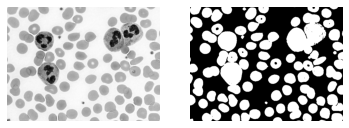

In [24]:
# colab


filename = 'binary/neutrophils.png'


src = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

th = 210
_, dst = cv2.threshold(src, th, 255, cv2.THRESH_BINARY_INV)

plt.subplot(121), plt.axis('off'), imshow("", src)
plt.subplot(122), plt.axis('off'), imshow("", dst)
             

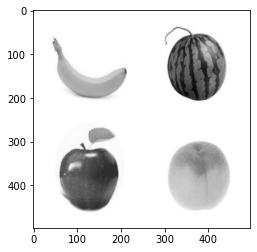

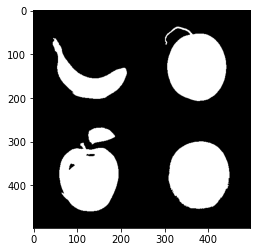

In [25]:
# colab2

img  = cv2.imread("binary/fruits.png", 0)
_, img_edge = cv2.threshold(img, 213, 255, cv2.THRESH_BINARY_INV)

imshow("", img)
plt.show()
imshow("", img_edge)

In [5]:
def on_threshold(pos):
    _, dst = cv2.threshold(src, pos, 255, cv2.THRESH_BINARY) 
    cv2.imshow('dst', dst)


filename = 'binary/fruits.png'

src = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

cv2.imshow('src', src)

cv2.namedWindow('dst')
cv2.createTrackbar('Threshold', 'dst', 0, 255, on_threshold) # th 조절하면서 볼 수 있음.
cv2.setTrackbarPos('Threshold', 'dst', 213) # 주피터노트북은 따로 파라미터가 없음.

cv2.waitKey(0) 

-1

## <span style="color:fuchsia">**📚 2. 개선된 이진화 알고리즘**</span>

180.0


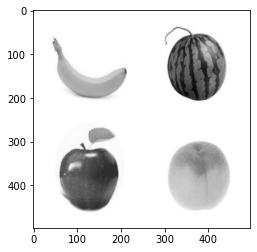

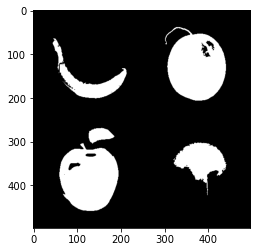

In [26]:
# colab
# 오츠알고리즘

img  = cv2.imread("binary/fruits.png", 0)
th, img_edge = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

print(th)

imshow("", img)
plt.show()
imshow("", img_edge)

## <span style="color:fuchsia">**📚 3. 적응형 이진화 방법**</span>

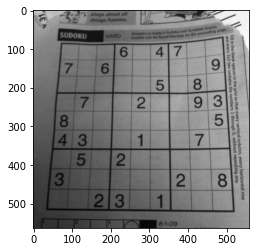

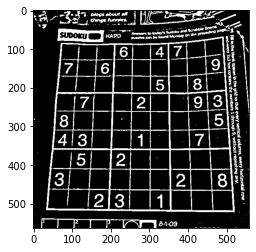

In [27]:
# colab
# 가우시안 평균 거리가 가까운 값에는 wait를 크게, 먼 곳은 작게. 

src  = cv2.imread("binary/sudoku.jpg", 0)

bsize = 31
dst = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, bsize, 7)

imshow("", src)
plt.show()
imshow("", dst)


132.0


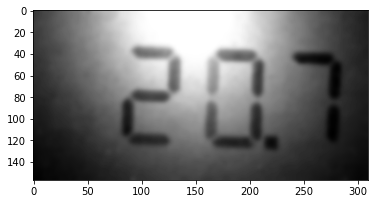

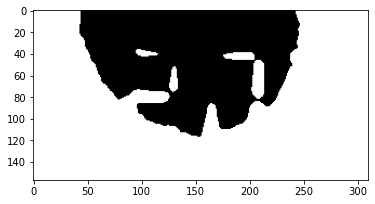

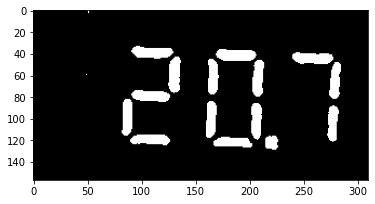

In [28]:
src  = cv2.imread("binary/207.png", 0)
src = cv2.GaussianBlur(src, (13,13), 0)

bsize = 21

th, dst = cv2.threshold(src,  -1, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
print(th)
dst2 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, bsize, 5)

imshow("", src)
plt.show()
imshow("", dst)
plt.show()
imshow("", dst2)

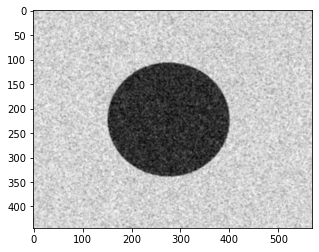

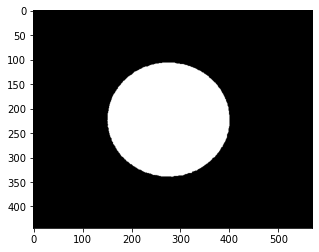

In [31]:
image = cv2.imread('binary/circle.png',0)
image = cv2.GaussianBlur(image, (5,5), 0)

_, binary = cv2.threshold(image, -1, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
#  지역적으로 작은지 큰지 보는 것.
# 단순 평균만 구하는 것이 아님.
imshow("", image)
plt.show()
imshow("", binary)
plt.show()
# 밝은 배경에 어두운 전경 -> inverse

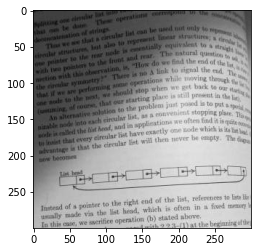

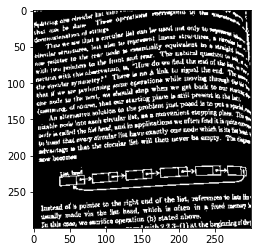

In [57]:
img = cv2.imread('binary/text.jpg', 0)

dst = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            cv2.THRESH_BINARY_INV, 31, 7)
imshow("", img)
plt.show()
imshow("", dst)
plt.show()

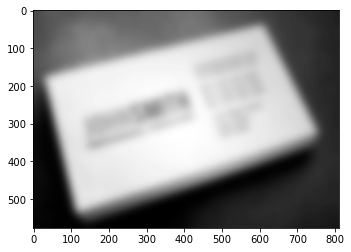

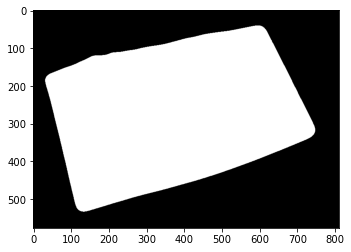

In [75]:
img = cv2.imread('binary/namecard.png', 0)

img  = cv2.GaussianBlur(img, (75,75), 0) # 크게 잡을수록 노이즈는 사라짐.

_, dst = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) # 이 영역만 따로 추출해서 
# 나중에 이 영역만 따로 이진화를 시킴.

imshow("", img)
plt.show()
imshow("", dst)

## <span style="color:fuchsia">**📚 4. 모폴로지 이진연산**</span>

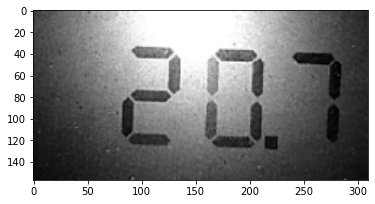

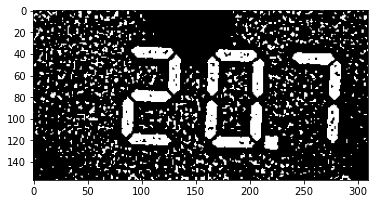

In [77]:
src  = cv2.imread("binary/207.png", 0)

dst = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, bsize, 5)
imshow("", src)
plt.show()
imshow("", dst)

(157, 620)


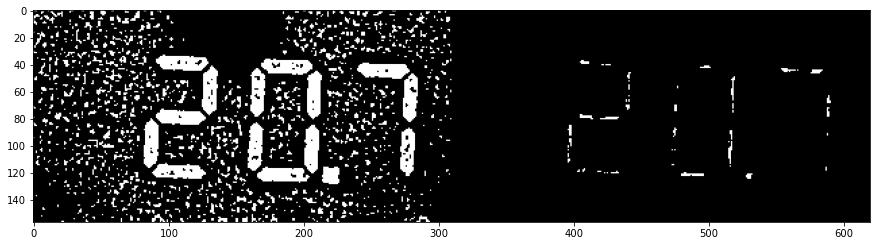

In [87]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

erode = cv2.erode(dst, kernel, iterations=1) # binary영상에 대해 kernel을 출력하는 것.

ouput = np.concatenate((dst, erode), axis=1) # axis=1 영상을 옆으로 붙이는 것.
print(output.shape)

plt.figure(figsize=(15, 10))
imshow("",output)

(157, 620)


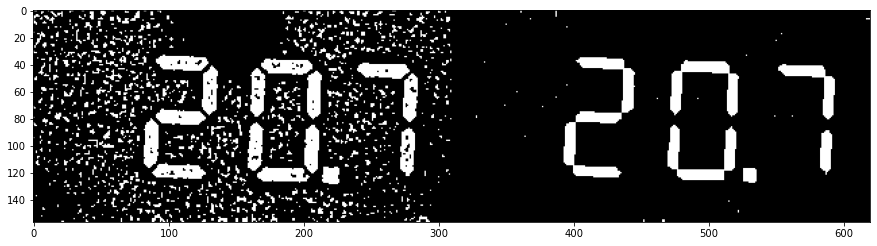

In [97]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)) # 3x3 rectangular로 진행

erode = cv2.erode(dst, kernel, iterations=3) # binary영상에 대해 kernel을 출력하는 것.

ouput = np.concatenate((dst, erode), axis=1) # axis=1 영상을 옆으로 붙이는 것.
print(output.shape)

plt.figure(figsize=(15, 10))
imshow("",output)

(157, 620)


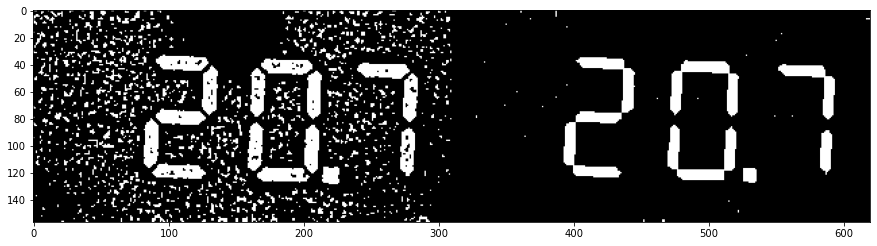

In [96]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

erode = cv2.erode(dst, kernel, iterations=1) # binary영상에 대해 kernel을 출력하는 것.
dilate = cv2.dilate(erode, kernel, iterations=3) # 깎고 다시 팽창
erode = cv2.erode(dilate, kernel, iterations=1)


ouput = np.concatenate((dst, erode), axis=1) # axis=1 영상을 옆으로 붙이는 것.
print(output.shape)

plt.figure(figsize=(15, 10))
imshow("",output)


(157, 620)


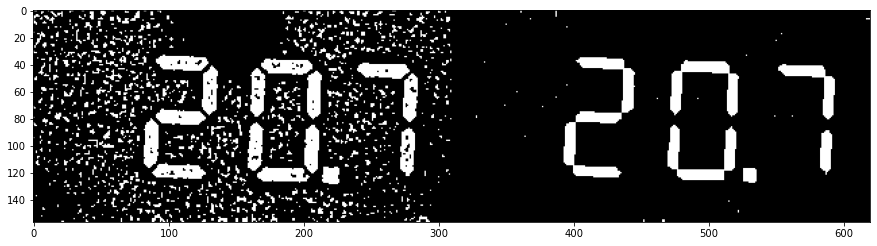

In [94]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))


temp = cv2.erode(dst, kernel, iterations=1)
temp = cv2.dilate(temp, kernel, iterations=3)
temp = cv2.erode(temp, kernel, iterations=3)

output = np.concatenate((dst,  temp),  axis=1)
print(output.shape)

plt.figure(figsize=(15, 10))
imshow("", output)

### <span style="color:fuchsia">**📚 4.1. 이진 연산의 열기와 닫기**</span>

(577, 1622)


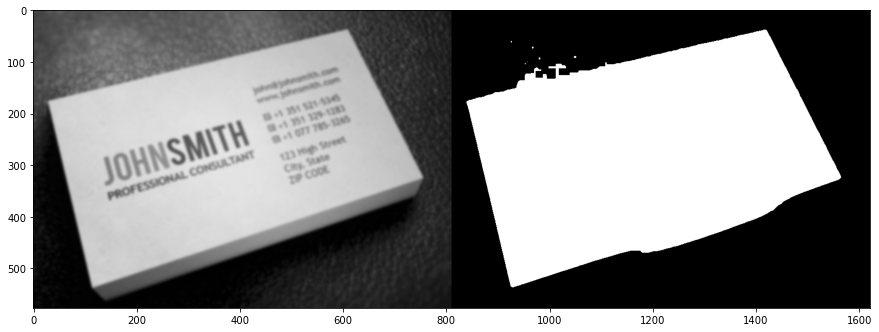

In [99]:
img = cv2.imread('binary/namecard.png', 0)
img = cv2.GaussianBlur(img, (13, 13), 0)

_,binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, None,iterations=6)


output = np.concatenate((img,  closed),  axis=1)
print(output.shape)
plt.figure(figsize=(15, 10))
imshow("", output)


### <span style="color:fuchsia">**📚 4.2. 바둑돌 구분하기**</span>

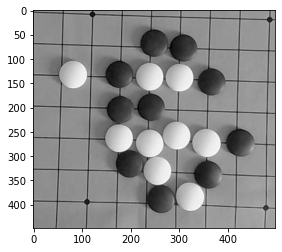

In [101]:
img = cv2.imread('binary/stone.png', 0)
imshow("", img)

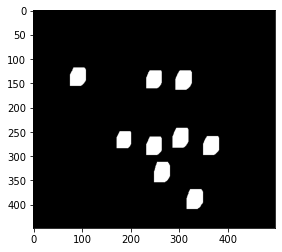

In [111]:
gray = cv2.GaussianBlur(img, (13, 13), 0)
_,binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

white = cv2.morphologyEx(binary, cv2.MORPH_OPEN, None, iterations=11)

imshow("",white)

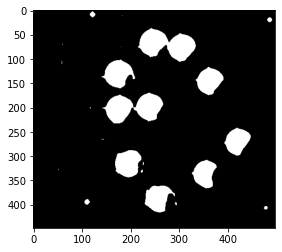

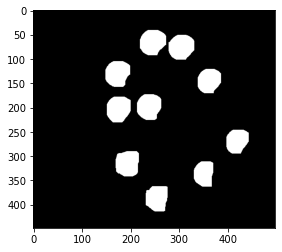

In [113]:
_,binary = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY_INV)

black = cv2.morphologyEx(binary, cv2.MORPH_OPEN, None,iterations=9)

imshow("", binary); plt.show()
imshow("", black)

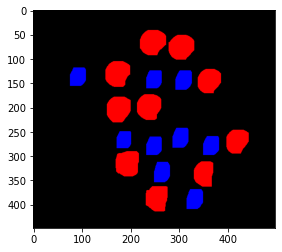

In [115]:
# 흰 돌과 빨간돌을 인식한 이미지 만들기
# 흰돌은 파란색, 검은돌은 빨간색
output = cv2.imread('binary/stone.png') 

output[:,:, 0] = white
output[:,:, 1] = 0
output[:,:, 2] = black

imshow("",output)

### <span style="color:fuchsia">**📚 5. 영상의 미분**</span>

[[162 162 162 161 162 157 163 161 165 161]
 [162 162 162 161 162 157 163 161 165 161]
 [162 162 162 161 162 157 163 161 165 161]
 [162 162 162 161 162 157 163 161 165 161]
 [162 162 162 161 162 157 163 161 165 161]
 [164 164 158 155 161 159 159 160 160 160]
 [160 160 163 158 160 162 159 156 159 162]
 [159 159 155 157 158 159 156 157 159 161]
 [155 155 158 158 159 160 157 157 163 157]
 [155 155 157 158 155 154 155 157 161 154]]
[[128 128 127 128 124 129 132 130 128 125]
 [128 128 127 128 124 129 132 130 128 125]
 [128 128 127 128 124 129 132 130 128 125]
 [128 128 127 128 124 129 132 130 128 125]
 [128 128 127 128 124 129 132 130 128 125]
 [128 122 119 131 132 126 129 129 128 123]
 [128 131 126 125 132 127 122 128 134 125]
 [128 124 126 131 130 126 126 131 132 130]
 [128 131 131 129 130 126 125 134 128 123]
 [128 130 131 126 124 128 131 134 125 122]]


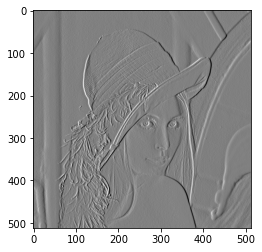

In [130]:
# x축을 미분

src = cv2.imread('img/lenna.bmp', 0)

mask_x = np.array([[0,0,0,],
                 [-1,0,1],
                 [0,0,0]]) # filter 적용

dx = cv2.filter2D(src, -1, mask, delta=128) # delta 추가 (검은색이였던(밋밋한)부분이 gray로 나오는 것.)

print(src[0:10, 0:10])  # 원본영상
print(dx[0:10, 0:10])   # x축 방향으로 미분한 것.

imshow("", dx)

[[162 162 162 161 162 157 163 161 165 161]
 [162 162 162 161 162 157 163 161 165 161]
 [162 162 162 161 162 157 163 161 165 161]
 [162 162 162 161 162 157 163 161 165 161]
 [162 162 162 161 162 157 163 161 165 161]
 [164 164 158 155 161 159 159 160 160 160]
 [160 160 163 158 160 162 159 156 159 162]
 [159 159 155 157 158 159 156 157 159 161]
 [155 155 158 158 159 160 157 157 163 157]
 [155 155 157 158 155 154 155 157 161 154]]
[[ 0.  0. -1.  0. -4.  1.  4.  2.  0. -3.]
 [ 0.  0. -1.  0. -4.  1.  4.  2.  0. -3.]
 [ 0.  0. -1.  0. -4.  1.  4.  2.  0. -3.]
 [ 0.  0. -1.  0. -4.  1.  4.  2.  0. -3.]
 [ 0.  0. -1.  0. -4.  1.  4.  2.  0. -3.]
 [ 0. -6. -9.  3.  4. -2.  1.  1.  0. -5.]
 [ 0.  3. -2. -3.  4. -1. -6.  0.  6. -3.]
 [ 0. -4. -2.  3.  2. -2. -2.  3.  4.  2.]
 [ 0.  3.  3.  1.  2. -2. -3.  6.  0. -5.]
 [ 0.  2.  3. -2. -4.  0.  3.  6. -3. -6.]]


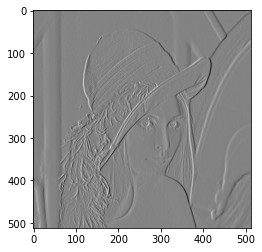

In [128]:
src = cv2.imread('img/lenna.bmp', 0)

mask = np.array([[0, 0, 0],
                 [-1, 0, 1],
                 [0, 0, 0]])

# dx = cv2.filter2D(src, -1, mask) # clip 0보다 작으면 0, 255보다 크면 255
dx = cv2.filter2D(src, cv2.CV_32F, mask)

print(src[0:10, 0:10])
print(dx[0:10, 0:10])

imshow("", dx)

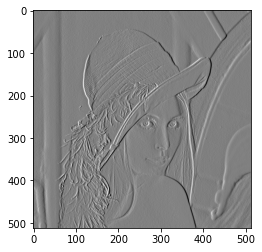

In [132]:
# y축을 미분(y축 방향으로의 이미지)

src = cv2.imread('img/lenna.bmp', 0)

mask_x = np.array([[0,-1,0,],
                  [0,0,0],
                  [0,1,0]]) # filter 적용

dy = cv2.filter2D(src, -1, mask, delta=128)
imshow("",dy)

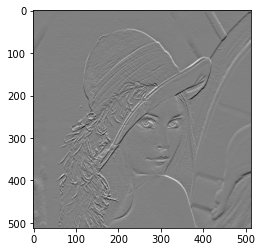

In [160]:
src = cv2.imread('img/lenna.bmp', 0)

mask_x = np.array([[0,-1,0,],
                  [0,0,0],
                  [0,1,0]]) # filter 적용

dy = cv2.filter2D(src, -1, mask, delta=128)
imshow("",dy)

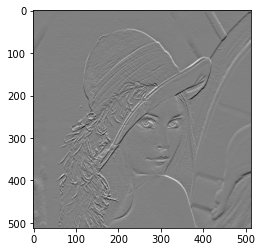

In [161]:
src = cv2.imread('img/lenna.bmp', 0)

mask_x = np.array([[0,-1,0,],
                  [0,0,0],
                  [0,1,0]]) # filter 적용

dx = cv2.filter2D(src, -1, mask, delta=128)
imshow("",dx)

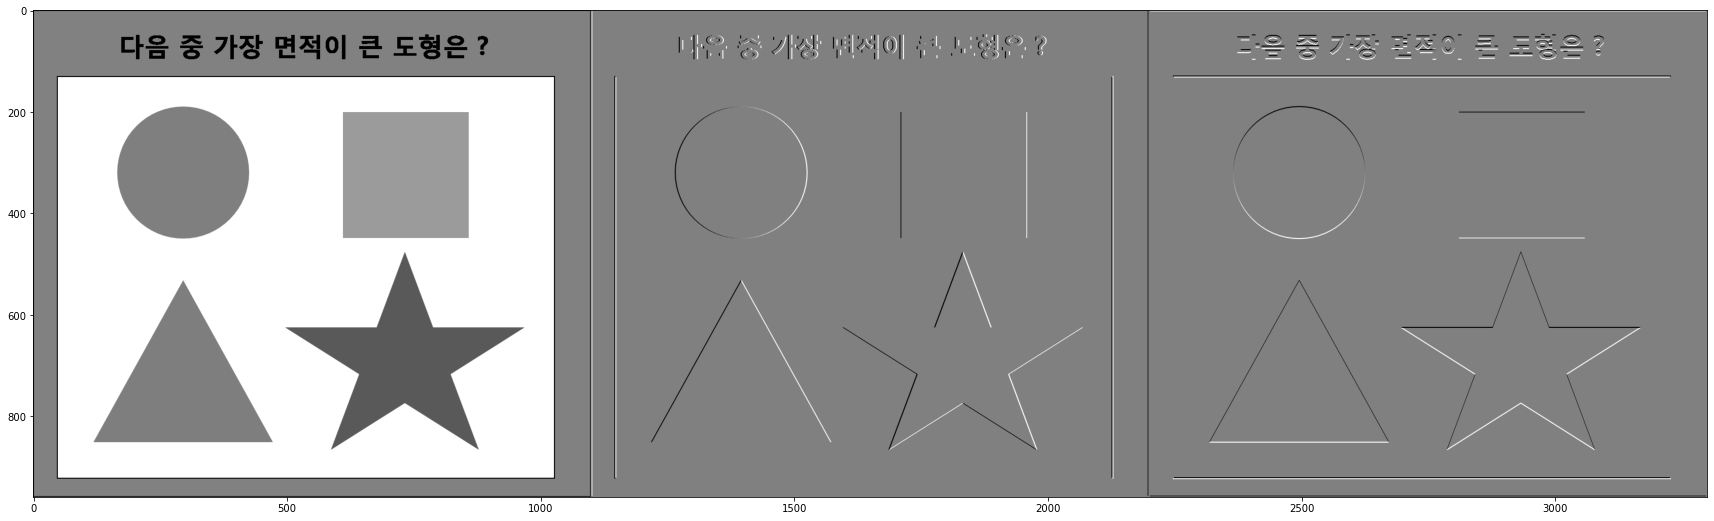

In [162]:
src = cv2.imread('binary/shapes2.png', 0)


mask = np.array([[0, 0, 0],
                 [-1, 0, 1],
                 [0, 0, 0]])

dx = cv2.filter2D(src, -1, mask, delta=128)

mask = np.array([[0, -1, 0],
                 [0, 0, 0],
                 [0, 1, 0]])
dy = cv2.filter2D(src, -1, mask, delta=128)

output = np.concatenate((src,  dx, dy),  axis=1)
plt.figure(figsize=(30, 10))
imshow("", output)

### 마스크 기반 에지 검출

In [164]:
mask = np.array([[0, 0, 0],
                 [-1, 0, 1],
                 [0, 0, 0]])
mask = np.array([[0, -1, 0],
                 [0, 0, 0],
                 [0, 1, 0]])

dx = cv2.filter2D(src, cv2.CV_32F, mask) # 뺀값을 그대로 가지고 계산해야하기때문에 -1 주면 안됨.
dy = cv2.filter2D(src, cv2.CV_32F, mask) 



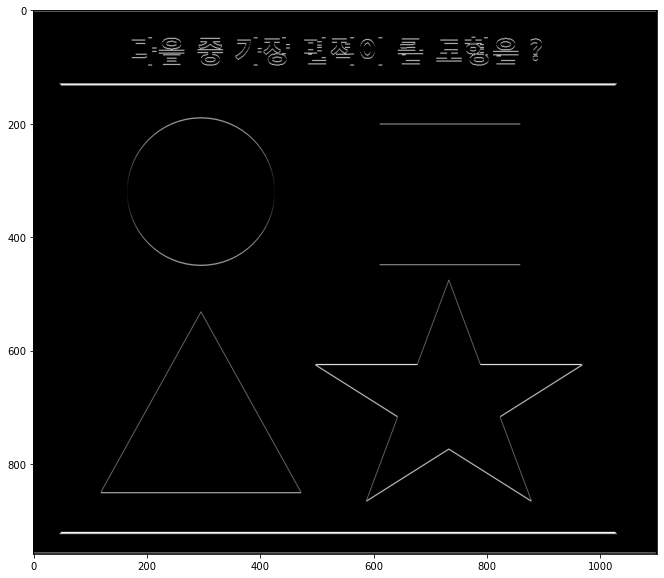

In [171]:

# 크기 구하기
mag = cv2.magnitude(dx, dy) # 각각의 값을 곱해 sqrt씌운 값이 들어있음. 
# 255보다 큰 값이 존재할 수 있음.
# mag2 = np.clip(mag, 0, 255) # 255보다 큰 것은 255로 표시. # float 타입인데 범위 지정한 것 뿐.
mag2 = np.uint8(np.clip(mag, 0, 255))

plt.figure(figsize=(30, 10))
imshow("",mag2)
# gradient 방향성분의 크기를 보여주고 있는 그래프가 나옴.

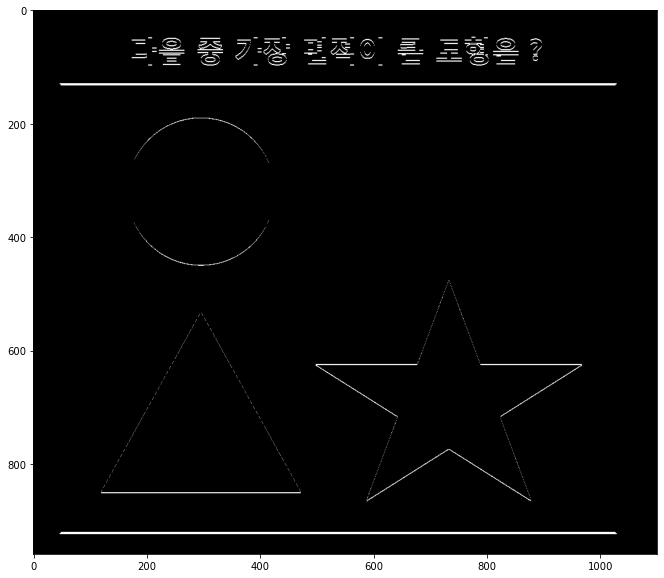

In [173]:
_,edge = cv2.threshold(mag2, 150, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(30, 10))
imshow("", edge)

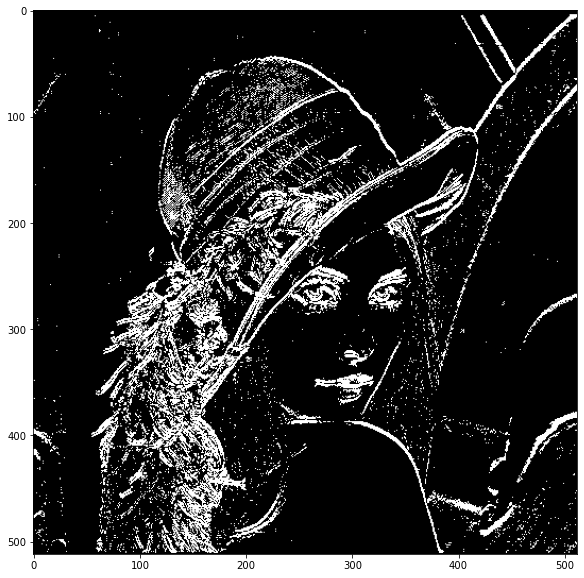

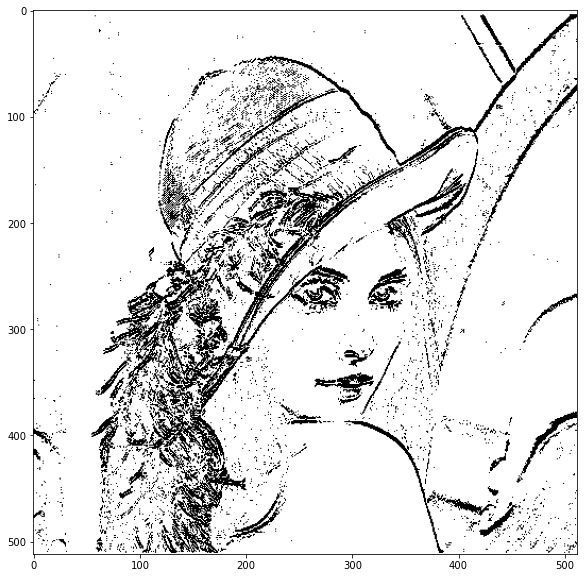

In [190]:
# lenna이미지로 전체 코드 짜보기

src = cv2.imread('img/lenna.bmp', 0)

mask = np.array([[0, 0, 0],
                 [-1, 0, 1],
                 [0, 0, 0]])
mask = np.array([[0, -1, 0],
                 [0, 0, 0],
                 [0, 1, 0]])

dx = cv2.filter2D(src, cv2.CV_32F, mask) # 뺀값을 그대로 가지고 계산해야하기때문에 -1 주면 안됨.
dy = cv2.filter2D(src, cv2.CV_32F, mask) 

mag = cv2.magnitude(dx, dy) # 각각의 값을 곱해 sqrt씌운 값이 들어있음. 
# 255보다 큰 값이 존재할 수 있음.
# mag2 = np.clip(mag, 0, 255) # 255보다 큰 것은 255로 표시. # float 타입인데 범위 지정한 것 뿐.
mag2 = np.uint8(np.clip(mag, 0, 255))

_,edge = cv2.threshold(mag2, 20, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(30, 10))
imshow("",edge)
plt.show()

plt.figure(figsize=(30, 10))
imshow("", 255-edge)

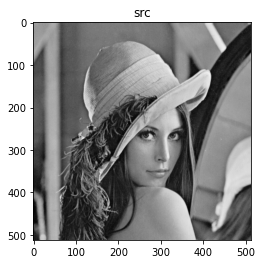

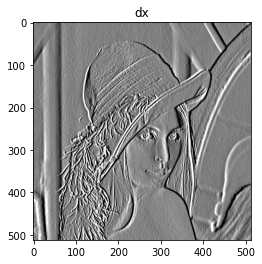

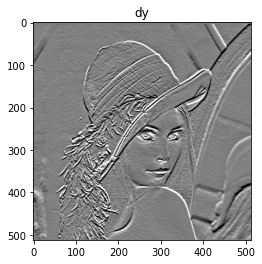

In [193]:
#sebel 필터 # 잡음에 덜 민감
src = cv2.imread('img/lenna.bmp', cv2.IMREAD_GRAYSCALE)

mx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]], dtype=np.float32)
my = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]], dtype=np.float32)

dx = cv2.filter2D(src, -1, mx, delta=128)
dy = cv2.filter2D(src, -1, my, delta=128)

imshow('src', src); plt.show()
imshow('dx', dx); plt.show()
imshow('dy', dy); plt.show()

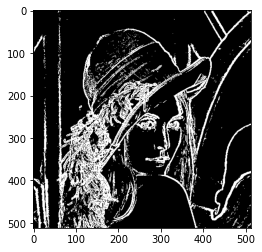

In [199]:
# edge의 크기를 나타낸 것.
dx = cv2.Sobel(src, cv2.CV_32F, 1, 0)
dy = cv2.Sobel(src, cv2.CV_32F, 0, 1)

edge  = (cv2.magnitude(dx, dy) > 70)*255
imshow("", edge)


In [206]:
# 방향성분 # 미분값이 (1,0)일 때 각도는 0도
dx = np.array([[1.0]])
# dz= np.array([[-1.0]])
dy = np.array([[0.0]])

o = cv2.phase(dx, dy, angleInDegrees=True)
print(o) # 0도

[[0.]]


In [204]:
# 방향성분 # 미분값이 (1,0)일 때 각도는 0도
# dx = np.array([[1.0]])
dz= np.array([[-1.0]])
dy = np.array([[0.0]])

o = cv2.phase(dz, dy, angleInDegrees=True)
print(o) # 180도

[[180.]]


In [207]:
# 방향성분 # 미분값이 (1,0)일 때 각도는 0도
dx = np.array([[0.0]])
# dz= np.array([[-1.0]])
dy = np.array([[1.0]])

o = cv2.phase(dx, dy, angleInDegrees=True)
print(o) # 90도

[[90.]]


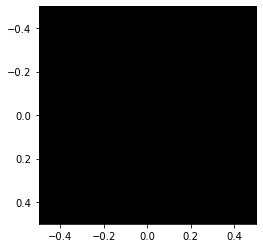

In [211]:
# 방향성분
#dx = np.array([[0.0]])
#dy = np.array([[1.0]])
#o = cv2.phase(dx, dy, angleInDegrees=True)
#print(o)

angle = cv2.phase(dx, dy, angleInDegrees=True)  
# 두 벡터가 이루는 방향을 설명할 수 있따.로 이해.
imshow("", angle)


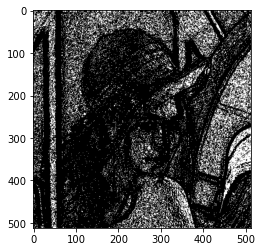

In [214]:
dx = cv2.Sobel(src, cv2.CV_32F, 1, 0)
dy = cv2.Sobel(src, cv2.CV_32F, 0, 1)

edge  = (cv2.magnitude(dx, dy)  < 10 )*255 
#  T_high  100          t_lo  20  20-100?
                                           


imshow("", edge)


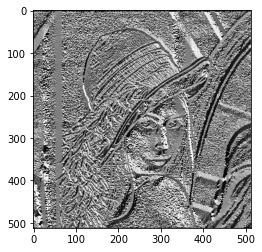

In [215]:

angle = cv2.phase(dx, dy, angleInDegrees=True) 
imshow("", angle)
